In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tkinter as tk

In [3]:
eng = pd.read_csv('eng.csv')
eng.drop(['ID', 'DOB', 'CollegeID', '12graduation' ,'10board', '12board' , 'CollegeState','CollegeCityID', 'CollegeCityTier','GraduationYear'], axis = 1, inplace = True)
eng.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [4]:
eng = eng.drop_duplicates()

In [5]:
eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2998 non-null   object 
 1   10percentage           2998 non-null   float64
 2   12percentage           2998 non-null   float64
 3   CollegeTier            2998 non-null   int64  
 4   Degree                 2998 non-null   object 
 5   Specialization         2998 non-null   object 
 6   collegeGPA             2998 non-null   float64
 7   English                2998 non-null   int64  
 8   Logical                2998 non-null   int64  
 9   Quant                  2998 non-null   int64  
 10  Domain                 2998 non-null   float64
 11  ComputerProgramming    2998 non-null   int64  
 12  ElectronicsAndSemicon  2998 non-null   int64  
 13  ComputerScience        2998 non-null   int64  
 14  MechanicalEngg         2998 non-null   int64  
 15  Elec

In [6]:
eng.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [7]:
eng.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [8]:
eng.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application',
       'computer science and technology', 'electrical engineering',
       'automobile/automotive engineering',
       'electronics and electrical engineering',
       'information science engineering', 'chemical engineering',
       'instrumentation engineering', 'electronics & instrumentation eng',
       'ceramic engineering', 'metallurgical engineering',
       'aeronautical engineering', 'electronics engineering',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation', 'civil engineering',
       'computer and communication engineering',
       'industrial & production engineering', 'computer networking',
       'other', '

In [9]:
eng.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [10]:
specialization = eng.Specialization.value_counts(ascending = False)
specialization

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electron

In [11]:
specializationlessthan10 = specialization[specialization<=10]
specializationlessthan10

Specialization
other                                      10
industrial & production engineering         8
chemical engineering                        7
applied electronics and instrumentation     5
mechanical and automation                   5
telecommunication engineering               4
automobile/automotive engineering           4
computer science and technology             4
aeronautical engineering                    3
instrumentation engineering                 3
electronics and computer engineering        3
mechatronics                                3
metallurgical engineering                   2
industrial engineering                      2
biomedical engineering                      2
information & communication technology      1
electronics                                 1
embedded systems technology                 1
industrial & management engineering         1
electrical and power engineering            1
computer and communication engineering      1
mechanical & produc

In [12]:
def removespeciallessthan10(value):
    if value in specializationlessthan10:
        return 'other'
    else:
        return value
eng.Specialization = eng.Specialization.apply(removespeciallessthan10)
eng.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [13]:
eng.Specialization.value_counts()

Specialization
electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
other                                           76
electrical engineering                          63
electronics & instrumentation eng               24
electronics and instrumentation engineering     18
instrumentation and control engineering         18
information science engineering                 18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
Name: count, dtype: int64

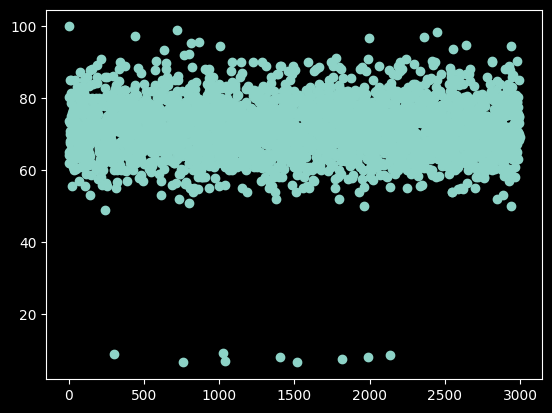

In [14]:
plt.scatter(eng.index, eng['collegeGPA'])

In [15]:
eng = eng[(eng['collegeGPA']>40)]
eng.shape

(2989, 24)

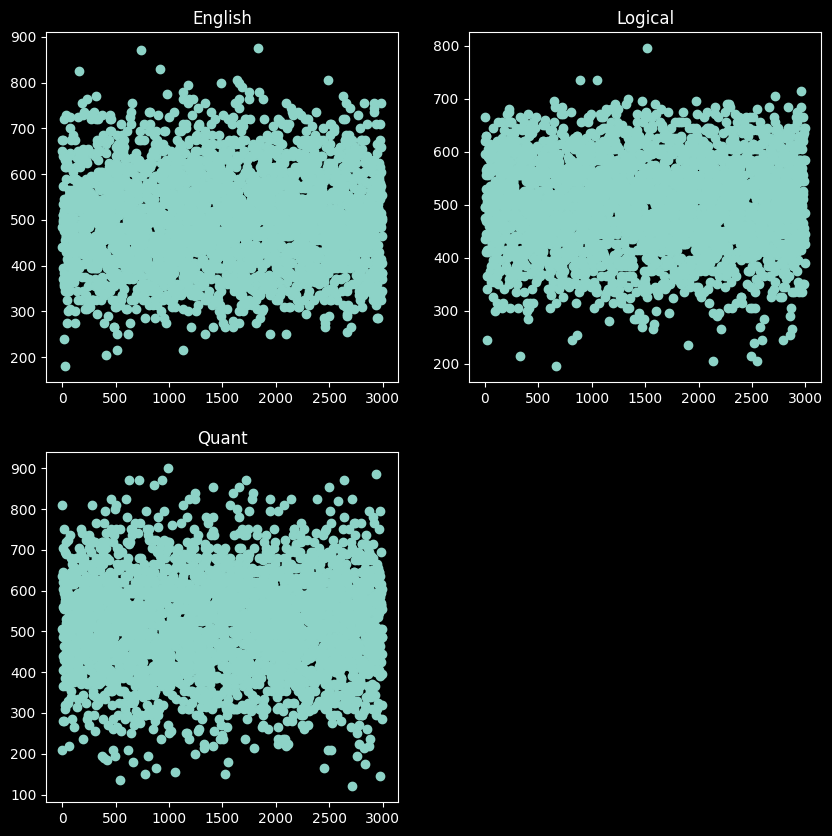

In [16]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(eng.index, eng.English)
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(eng.index, eng.Logical)
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(eng.index, eng.Quant)
plt.title('Quant')

plt.show()

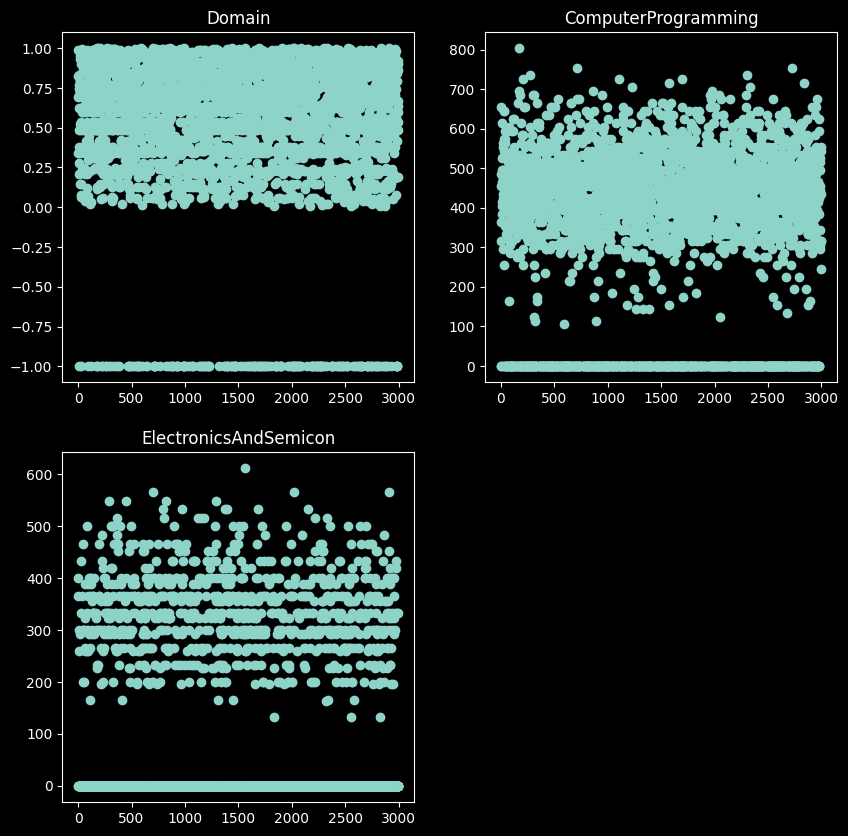

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
plt.scatter(eng.index, eng.Domain)
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(eng.index, eng.ComputerProgramming)
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(eng.index, eng.ElectronicsAndSemicon)
plt.title('ElectronicsAndSemicon')

plt.show()

In [18]:
eng = eng.replace(-1, np.nan)
cols_with_nan = [column for column in eng.columns if eng.isna().sum()[column] > 0]
for column in cols_with_nan:
    eng[column] = eng[column].fillna(eng[column].mean())
eng.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


C:\Users\Dell\AppData\Local\Temp\ipykernel_2972\3300675699.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=eng, x='Gender', palette='inferno')


<Axes: xlabel='Gender', ylabel='count'>

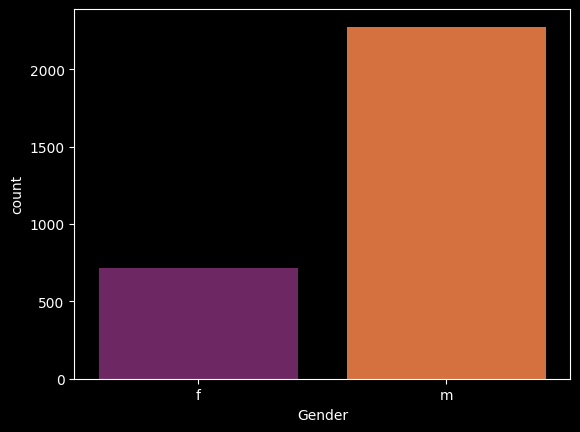

In [19]:
sns.countplot(data=eng, x='Gender', palette='inferno')

<Axes: xlabel='10percentage', ylabel='12percentage'>

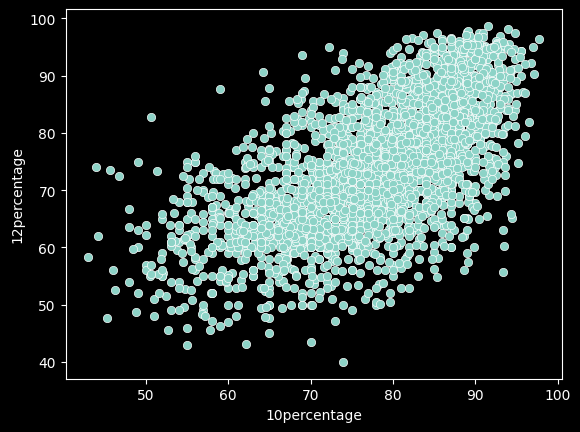

In [20]:
sns.scatterplot(x=eng['10percentage'], y=eng['12percentage'])

<Axes: xlabel='10percentage', ylabel='12percentage'>

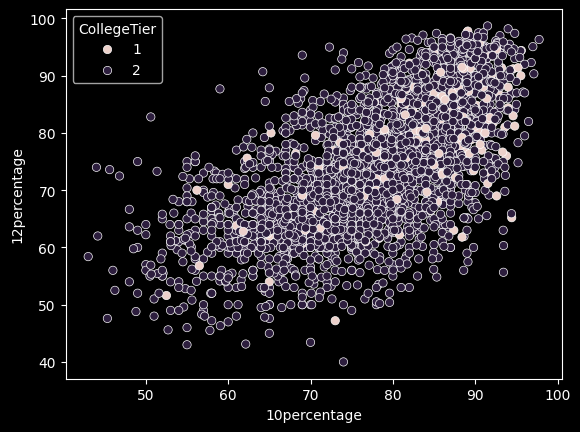

In [21]:
sns.scatterplot(x=eng['10percentage'], y=eng['12percentage'], hue=eng['CollegeTier'])

In [22]:
le = LabelEncoder()

eng.Gender = le.fit_transform(eng.Gender)
eng.Degree = le.fit_transform(eng.Degree)
eng.Specialization = le.fit_transform(eng.Specialization)

eng.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,87.80,84.00,1,0,14,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,57.00,64.50,2,0,4,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,77.33,85.17,2,0,7,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,84.30,86.00,1,0,4,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,82.00,75.00,2,0,0,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [23]:
eng_corr = eng.corr()
print(eng_corr)

                         Gender  10percentage  12percentage  CollegeTier  \
Gender                 1.000000     -0.164867     -0.140589    -0.034501   
10percentage          -0.164867      1.000000      0.645281    -0.142844   
12percentage          -0.140589      0.645281      1.000000    -0.110689   
CollegeTier           -0.034501     -0.142844     -0.110689     1.000000   
Degree                 0.007020     -0.258465     -0.238906     0.002842   
Specialization         0.067692      0.072453      0.050855    -0.019073   
collegeGPA            -0.179383      0.345185      0.383050    -0.112850   
English                0.013449      0.348248      0.211317    -0.185036   
Logical                0.016298      0.307913      0.237327    -0.193863   
Quant                  0.100518      0.329264      0.317179    -0.250948   
Domain                 0.018217      0.160718      0.153549    -0.111776   
ComputerProgramming    0.053602      0.149457      0.126121    -0.155722   
ElectronicsA

In [24]:
eng.drop(['CollegeTier','12percentage', 'Degree', 'English', 'Logical' ,'Domain', 'ComputerProgramming' , 'ElectronicsAndSemicon','ComputerScience', 'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','extraversion','nueroticism','Salary'], axis = 1, inplace = True)

In [25]:
eng.head()

,Gender,10percentage,Specialization,collegeGPA,Quant,conscientiousness,agreeableness,openess_to_experience
0,0,87.80,14,73.82,810,-0.1590,0.3789,0.2889
1,1,57.00,4,65.00,210,1.1336,0.0459,-0.2859
2,1,77.33,7,61.94,505,0.5100,-0.1232,-0.2875
3,1,84.30,4,80.40,635,-0.4463,0.2124,0.4805
4,0,82.00,0,64.30,365,-1.4992,-0.7473,0.1864


In [26]:
# Assuming your dataset has a 'gender' column with values 'male' and 'female'
X = eng.drop('Gender', axis=1)  # Features
y = eng['Gender']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Use the trained model to predict labels for the test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get classification report
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.68
              precision    recall  f1-score   support

           0       0.30      0.32      0.31       134
           1       0.80      0.78      0.79       464

    accuracy                           0.68       598
   macro avg       0.55      0.55      0.55       598
weighted avg       0.69      0.68      0.68       598

Confusion Matrix:
[[ 43  91]
 [101 363]]


In [3]:
# Create the Tkinter GUI
root = tk.Tk()
root.title("Decision Tree Classifier")

# Create input fields for the user to enter feature values
input_fields = []
for feature in X.columns:
    label = tk.Label(root, text=feature)
    label.grid(row=len(input_fields), column=0)
    entry = tk.Entry(root)
    entry.grid(row=len(input_fields), column=1)
    input_fields.append(entry)

# Define the prediction function
def predict():
    input_values = [float(entry.get()) for entry in input_fields]
    prediction = model.predict([input_values])[0]
    
    # Determine the predicted class label based on the prediction
    predicted_class = eng['Gender'].unique()[int(prediction)]
    
    # Map the predicted class to 'a' or 'b'
    if predicted_class == 0:
        result_label.config(text="Predicted class: Female")
    else:
        result_label.config(text="Predicted class: Male")

# Create the predict button and result label
predict_button = tk.Button(root, text="Predict", command=predict)
predict_button.grid(row=len(X.columns), column=0, columnspan=2)

result_label = tk.Label(root, text="")
result_label.grid(row=len(X.columns) + 1, column=0, columnspan=2)

root.mainloop()

NameError: name 'X' is not defined